<span style="font-size: 14pt">MIPT, TS forecasting in Retail, Autumn 2017</span>

<span style="font-size: 16pt"> Training ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>d

## Select best ES model for each TS 

* I.   Download datasets <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     
* II. Define the train period: the beginning is 12.05.2005 and the end is 13.06.2006
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
    - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage.
    - 1) forecasting delay $h = 1$, loss function is MACAPE;
    - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
   
    - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
    
    - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
    - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 
       
    - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
    - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

    - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

In [1]:
import pandas as pd
import math
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from IPython import display
import statsmodels.api as sm
from utils import qualityMACAPE, build_forecast, plot_tsforecast
from utils import InitExponentialSmoothing, AdaptiveExponentialSmoothing, WintersExponentialSmoothing, TWExponentialSmoothing
%matplotlib inline

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## I. Download datasets 

In [2]:
# Read data
ts = pd.read_csv('./data/TS_dep36.csv', sep=';', index_col='Timestamp', parse_dates=True, dayfirst=True)

## II. Define the train period: the beginning is 12.05.2005 and the end is 13.06.2006

* I use the data from '2005-05-12'-'2006-03-12'


For each model we find best params for EACH of TS and save values in corresponding .csv 

* For finding best params i use 11 values in [0,1].

* In IES and AES I use "Adaptation period"=10. But the results for values from 5 to 10 are almost same.

* In the models with more than one params (AES, WES, TWES), I use the method of sequentual approximations. I.e. e.g. for WES

    1. initialize any $\alpha$-s and $\gamma$-s
    
    2. for initialised $\alpha$-s find best $\gamma$-s and vice versa
    
    3. for new $\alpha$-s find best $\gamma$-s and vice versa
    
    4. do it untill mean_LF(new $\alpha$-s and previous $\gamma$-s)=mean_LF(previous $\alpha$-s and new $\gamma$-s), and both stop changes

## III. Find the best ES algorithm for each ts

In [3]:
# plotTSForecast(ts.loc['2009-01-01':'2009-03-31'], frc_ts.loc['2009-01-01':'2009-03-31'], ts_num=0, alg_title='ES alpha=0.1')

#Fit parameters
ALPHA = np.linspace(0,1,11)
es_params_array = [{'alpha':alpha, 'AdaptationPeriod':10} for alpha in ALPHA]
FRC_TS = build_forecast(h=1, ts=ts, algname =  'InitExponentialSmoothing', algtitle='IES' ,params_array = es_params_array)

# line=np.linspace(0,1,11)
# h = 1
# start = train_ts.index[-1]+timedelta(1)
# end = train_ts.index[-1]+timedelta(h)
# rng = pd.date_range(start, end)

# best=np.zeros([len(ts.columns),4,3])
# ies = pd.DataFrame(index = train_ts.index.append(rng), columns = ts.columns)
# aes = pd.DataFrame(index = train_ts.index.append(rng), columns = ts.columns)
# w = pd.DataFrame(index = train_ts.index.append(rng), columns = ts.columns)
# tw = pd.DataFrame(index = train_ts.index.append(rng), columns = ts.columns)

NameError: name 'pd' is not defined

#### IES

In [23]:
j=0
accs=[]
for alpha in line:
    accs.append([])
    i=0
    for col in ts.columns:
        print(j)
        print(i)
        display.clear_output(wait=True)
        ies[col] = InitExponentialSmoothing(train_ts[col], h, {'alpha':alpha, 'AdaptationPeriod': 10})
        accs[j].append(1-qualityMACAPE(ies[col],train_ts[col])[0])
        i+=1
    j+=1

10
104


In [24]:
ies_accs=np.array(accs)
arg_max_accs=np.argmax(accs, axis=0)
ies_alphas=line[arg_max_accs]
print("IES alphas:\n"+str(ies_alphas))
print(ies_accs.max(axis=0).mean())

ies_alphas = pd.Series(ies_alphas)
ies_alphas.to_csv('params/ies_alphas.csv')

IES alphas:
[ 0.   0.1  0.1  0.1  0.   0.1  0.1  0.   0.   0.   0.1  0.   0.1  0.1  0.
  0.1  0.1  0.   0.1  0.1  0.1  0.   0.   0.1  0.   0.1  0.1  0.1  0.   0.1
  0.1  0.   0.1  1.   0.   0.1  0.1  0.1  0.1  0.1  0.2  0.   0.   0.   0.
  0.1  0.   0.1  0.   0.1  0.1  0.1  0.   0.1  0.   0.1  0.1  0.1  0.1  0.1
  0.   0.   0.1  0.1  0.1  1.   1.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  1.   0.   1.   0.1  0.1  0.1  0.1  1.   0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.   0.1  0.1  0.1  0.1  1.   1.   0.1  0.2  0.1  0.1  0.1  0.1]
0.256956480128


#### AES

In [96]:
aes_alphas=np.ones(len(ts.columns))/10.0
aes_gammas=np.ones(len(ts.columns))/10.0

In [104]:
# j=0
# accs1=[]
# for alpha in line:
#     accs1.append([])
#     i=0
#     for col in ts.columns:
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         aes[col] = AdaptiveExponentialSmoothing(train_ts[col], h, {'alpha':alpha, 'gamma': aes_gammas[i], 'AdaptationPeriod':10})
#         accs1[j].append(1-qualityMACAPE(aes[col],train_ts[col])[0])
#         i+=1
#     j+=1

# j=0
accs2=[]
for gamma in line:
    accs2.append([])
    i=0
    for col in ts.columns:
        print('gamma')
        print(j)
        print(i)
        display.clear_output(wait=True)
        aes[col] = AdaptiveExponentialSmoothing(train_ts[col], h, {'alpha':aes_alphas[i], 'gamma': gamma, 'AdaptationPeriod':10})
        accs2[j].append(1-qualityMACAPE(aes[col],train_ts[col])[0])
        i+=1
    j+=1

gamma
10
104


In [105]:
aes_accs1=np.array(accs1)
arg_max_accs1=np.argmax(aes_accs1, axis=0)
aes_alphas=line[arg_max_accs1]

aes_accs2=np.array(accs2)
arg_max_accs2=np.argmax(aes_accs2, axis=0)
aes_gammas=line[arg_max_accs2]

aes_alphas = pd.Series(aes_alphas)
aes_alphas.to_csv('params/aes_alphas.csv'.format(i))

aes_gammas = pd.Series(aes_gammas)
aes_gammas.to_csv('params/aes_gammas.csv'.format(i))

In [106]:
print("AES alphas:\n"+str(np.array(aes_alphas)))
print("AES gammas:\n"+str(np.array(aes_gammas)))

print('\n')
print(aes_accs1.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),accs1.max(axis=0))
# plt.show()
print(aes_accs2.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),accs2.max(axis=0))
# plt.show()

AES alphas:
[ 0.   0.1  0.1  0.1  0.   0.1  0.1  0.   0.   0.   0.1  0.   0.1  0.1  0.
  0.1  0.1  0.   0.1  0.1  0.1  0.   0.   0.1  0.   0.1  0.1  0.1  0.   0.1
  0.1  0.   0.1  1.   0.   0.1  0.1  0.1  0.1  0.1  0.2  0.   0.   0.   0.
  0.1  0.   0.1  0.   0.1  0.1  0.1  0.   0.1  0.   0.1  0.1  0.1  0.1  0.1
  0.   0.   0.1  0.1  0.1  0.   0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.   1.   0.   0.2  0.1  0.1  0.1  0.1  1.   0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.   0.1  0.1  0.1  0.1  0.   0.   0.1  0.2  0.1  0.1  0.1  0.1]
AES gammas:
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.1  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

#### WES

In [108]:
w_alphas=np.ones(len(ts.columns))/10.0
w_gammas=np.ones(len(ts.columns))/10.0

In [115]:
j=0
accs1=[]
for alpha in line:
    accs1.append([])
    i=0
    for col in ts.columns:
        print(j)
        print(i)
        display.clear_output(wait=True)
        w[col] = WintersExponentialSmoothing(train_ts[col], h, {'alpha':alpha, 'gamma': w_gammas[i], 'seasonality_period':7})
        accs1[j].append(1-qualityMACAPE(w[col],train_ts[col])[0])
        i+=1
    j+=1

# j=0
# accs2=[]
# for gamma in line:
#     accs2.append([])
#     i=0
#     for col in ts.columns:
#         print('gamma')
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         w[col] = WintersExponentialSmoothing(train_ts[col], h, {'alpha':w_alphas[i], 'gamma': gamma, 'seasonality_period':7})
#         accs2[j].append(1-qualityMACAPE(w[col],train_ts[col])[0])
#         i+=1
#     j+=1

10
104


In [116]:
w_accs1=np.array(accs1)
arg_max_accs1=np.argmax(w_accs1, axis=0)
w_alphas=line[arg_max_accs1]
print("WES alphas:\n"+str(w_alphas))

w_accs2=np.array(accs2)
arg_max_accs2=np.argmax(w_accs2, axis=0)
w_gammas=line[arg_max_accs2]
print("WES gammas:\n"+str(w_gammas))

w_alphas = pd.Series(w_alphas)
w_alphas.to_csv('params/w_alphas.csv')

w_gammas = pd.Series(w_gammas)
w_gammas.to_csv('params/w_gammas.csv')


print('\n')
print(w_accs1.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),w_accs1.max(axis=0))
# plt.show()
print(w_accs2.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),w_accs2.max(axis=0))
# plt.show()

WES alphas:
[ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1
  0.   0.1  0.   0.1  0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.1  0.   0.1  0.   0.   0.1  0.   0.   0.1  0.   0.   0.
  0.1  0.1  0.1  0.1  0.   0.1  0.   0.   0.   0.   0.   0.1  0.   0.   0.
  0.   0.   0.   0.1  0.   0.   0.2  0.   0.1  0.1  0.1  0.1  0.   0.1  0.1
  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.   0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.   0.1  0.1  1.   0.3  0.2  0.2  0.1  0.1  0.1  0.1]
WES gammas:
[ 0.2  0.2  0.2  0.3  0.1  0.3  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.   0.2  0.2  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.2  0.1
  0.1  0.2  0.1  0.1  0.2  0.1  0.1  0.2  0.1  0.2  0.   0.1  0.2  0.1  0.1
  0.2  0.1  0.2  0.1  0.3  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.3
  0.1  0.1  0.2  0.1  0.3  0.1  0.1  0.2  0.2  0.2  0.1  0.1  0.2  0.1  0.1
  0.   0.1  0.2  0.1  0.2  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1 

#### TWES

In [67]:
tw_alphas=np.ones(len(ts.columns))/10.0
tw_betas=np.ones(len(ts.columns))/10.0
tw_gammas=np.ones(len(ts.columns))/10.0

In [86]:
# accuracies for alpha
# j=0
# accs1=[]
# for alpha in line:
#     accs1.append([])
#     i=0
#     for col in ts.columns:
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         tw[col] = TWExponentialSmoothing(train_ts[col], h, {'alpha':alpha, 'beta':tw_betas[i], 'gamma': tw_gammas[i], 'seasonality_period':7})
#         accs1[j].append(1-qualityMACAPE(tw[col],train_ts[col])[0])
#         i+=1
#     j+=1

# # accuracies for gamma
# j=0
# accs2=[]
# for gamma in line:
#     accs2.append([])
#     i=0
#     for col in ts.columns:
#         print('gamma')
#         print(j)
#         print(i)
#         display.clear_output(wait=True)
#         tw[col] = TWExponentialSmoothing(train_ts[col], h, {'alpha':tw_alphas[i], 'beta':tw_betas[i], 'gamma': gamma, 'seasonality_period':7})
#         accs2[j].append(1-qualityMACAPE(tw[col],train_ts[col])[0])
#         i+=1
#     j+=1

# accuracies for beta
j=0
accs3=[]
for beta in line:
    accs3.append([])
    i=0
    for col in ts.columns:
        print('beta')
        print(j)
        print(i)
        display.clear_output(wait=True)
        tw[col] = TWExponentialSmoothing(train_ts[col], h, {'alpha':tw_alphas[i], 'beta':beta, 'gamma': tw_gammas[i], 'seasonality_period':7})
        accs3[j].append(1-qualityMACAPE(tw[col],train_ts[col])[0])
        i+=1
    j+=1

beta
10
104


In [117]:
tw_accs1=np.array(accs1)
arg_max_accs1=np.argmax(tw_accs1, axis=0)
tw_alphas=line[arg_max_accs1]

tw_accs2=np.array(accs2)
arg_max_accs2=np.argmax(tw_accs2, axis=0)
tw_gammas=line[arg_max_accs2]

tw_accs3=np.array(accs3)
arg_max_accs3=np.argmax(tw_accs3, axis=0)
tw_betas=line[arg_max_accs3]
print('\n')


tw_alphas = pd.Series(tw_alphas)
tw_alphas.to_csv('params/tw_alphas.csv')

tw_gammas = pd.Series(tw_gammas)
tw_gammas.to_csv('params/tw_gammas.csv')

tw_betas = pd.Series(tw_betas)
tw_betas.to_csv('params/tw_betas.csv')

In [119]:
print("TWES alphas:\n"+str(np.array(tw_alphas)))
print("TWES gammas:\n"+str(np.array(tw_gammas)))
print("TWES betas:\n"+str(np.array(tw_betas)))

print(tw_accs1.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),tw_accs1.max(axis=0))
# plt.show()
print(tw_accs2.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),tw_accs2.max(axis=0))
# plt.show()
print(tw_accs3.max(axis=0).mean())
# plt.plot(range(len(ts.columns)),tw_accs3.max(axis=0))
# plt.show()

TWES alphas:
[ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.1  0.   0.1  0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.1  0.   0.   0.
  0.1  0.   0.1  0.   0.   0.1  0.   0.   0.   0.   0.   0.1  0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.1  0.   0.1  0.1  0.   0.   0.   0.   0.1
  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.   0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.   0.1  0.1  1.   0.3  0.2  0.2  0.1  0.1  0.1  0.1]
TWES gammas:
[ 0.2  0.2  0.2  0.3  0.1  0.3  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2
  0.1  0.1  0.1  0.   0.2  0.2  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.2  0.1
  0.1  0.2  0.1  1.   0.2  0.1  0.1  0.2  0.2  0.2  0.   0.1  0.2  0.1  0.1
  0.2  0.2  0.2  0.2  0.3  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.3
  0.1  0.1  0.2  0.2  0.3  0.1  0.1  0.2  0.2  0.2  0.3  0.2  0.2  0.2  0.1
  0.   0.1  0.2  0.1  0.2  0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1

## Step 3

Get found best params from saved .csv files

In [11]:
ies_alphas=np.array(pd.read_csv('params/ies_alphas.csv',header=None))[:,1]
aes_alphas=np.array(pd.read_csv('params/aes_alphas.csv',header=None))[:,1]
aes_gammas=np.array(pd.read_csv('params/aes_gammas.csv',header=None))[:,1]
w_alphas=np.array(pd.read_csv('params/w_alphas.csv',header=None))[:,1]
w_gammas=np.array(pd.read_csv('params/w_gammas.csv',header=None))[:,1]
tw_alphas=np.array(pd.read_csv('params/tw_alphas.csv',header=None))[:,1]
tw_betas=np.array(pd.read_csv('params/tw_betas.csv',header=None))[:,1]
tw_gammas=np.array(pd.read_csv('params/tw_gammas.csv',header=None))[:,1]

I use the data from '2005-05-12' - '2006-04-30' to make prediction

In [77]:
ts_for=ts['2005-05-12':'2006-04-30']

h = 1
start = ts_for.index[-1]+timedelta(1)
end = ts_for.index[-1]+timedelta(h)
rng = pd.date_range(start, end)

ies = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)
aes = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)
w = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)
tw = pd.DataFrame(index = ts_for.index.append(rng), columns = ts.columns)

i=0
for col in ts.columns:
    print(i)
    display.clear_output(wait=True)
    ies[col] = InitExponentialSmoothing(ts_for[col], h, {'alpha':ies_alphas[i], 'AdaptationPeriod': 10})
    aes[col] = AdaptiveExponentialSmoothing(ts_for[col], h, {'alpha':aes_alphas[i], 'gamma': aes_gammas[i], 'AdaptationPeriod':10})
    w[col] = WintersExponentialSmoothing(ts_for[col], h, {'alpha':w_alphas[i], 'gamma': w_gammas[i], 'seasonality_period':7})
    tw[col] = TWExponentialSmoothing(ts_for[col], h, {'alpha':tw_alphas[i], 'beta':tw_betas[i], 'gamma': tw_gammas[i], 'seasonality_period':7})
    i+=1


104


## Step 4

Calculating accuracies and finding best models for EACH of TS

In [78]:
ies_accs=[]
aes_accs=[]
w_accs=[]
tw_accs=[]

for col in ts.columns:
    ies_accs.append(1-qualityMACAPE(ies[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])
    aes_accs.append(1-qualityMACAPE(aes[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])
    w_accs.append(1-qualityMACAPE(w[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])
    tw_accs.append(1-qualityMACAPE(tw[col]['2006-03-13':],ts_for[col]['2006-03-13':])[0])

all_accs=np.array([ies_accs,aes_accs,w_accs,tw_accs])

best_models=np.argmax(all_accs, axis=0)

Each element of array bellow means number of best model corresponds to each TS

In [79]:
print('Best models for the series\n')
print('0: IES, 1: AES, 2: WES, 3: TWES\n')

print(best_models)

Best models for the series

0: IES, 1: AES, 2: WES, 3: TWES

[0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 2 0 2 2 0 0 0
 2 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 3 2 0
 0 0 2 2 2 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0]


## Step 5
Build the histogram of best Accuracy distribution

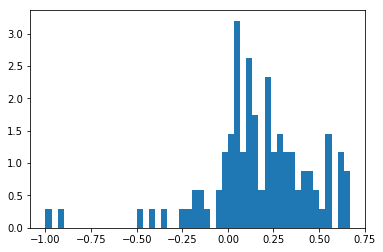

In [80]:
best_all_accs=pd.Series(all_accs.max(axis=0)).dropna()

plt.hist(best_all_accs, bins=50,  normed=1)
plt.show()

<br /><br /><br />
<h1 align="center">IV</h1>
Use whole data to make prediction. Note that each TS predicted individually by one's best model.

In [81]:
ts_all=ts

# Remove TS-s that have NaNs at 10 last cells
for col in ts.columns:
    if len(ts[col]['2006-06-03':].dropna())==0:
        ts_all=ts_all.drop(col, 1)
        
h = 1
start = ts_all.index[-1]+timedelta(1)
end = ts_all.index[-1]+timedelta(h)
rng = pd.date_range(start, end)

es = pd.DataFrame(index = ts_all.index.append(rng), columns = ts_all.columns)

i=0
for col in ts_all.columns:
    print(i)
    display.clear_output(wait=True)
    if best_models[i]==0:
        es[col] = InitExponentialSmoothing(ts_all[col], h, {'alpha':ies_alphas[i], 'AdaptationPeriod': 10})
    elif best_models[i]==1:
        es[col] = AdaptiveExponentialSmoothing(ts_all[col], h, {'alpha':aes_alphas[i], 'gamma': aes_gammas[i], 'AdaptationPeriod':10})
    elif best_models[i]==2:
        es[col] = WintersExponentialSmoothing(ts_all[col], h, {'alpha':w_alphas[i], 'gamma': w_gammas[i], 'seasonality_period':7})
    else:
        es[col] = TWExponentialSmoothing(ts_all[col], h, {'alpha':tw_alphas[i], 'beta':tw_betas[i], 'gamma': tw_gammas[i], 'seasonality_period':7})
    i+=1

92


## Step 4.1

Calculate accuracies for unused data

In [28]:
accs_body=[]
accs_tail=[]

for col in ts_all.columns:
    accs_body.append(1-qualityMACAPE(es[col][:'2006-04-30'],ts_all[col][:'2006-04-30'])[0])
    accs_tail.append(1-qualityMACAPE(es[col]['2006-04-30':],ts_all[col]['2006-04-30':])[0])

## Step 4.2
Build the histogram of Accuracy distribution

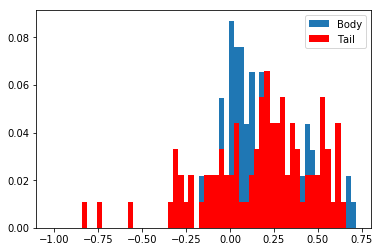

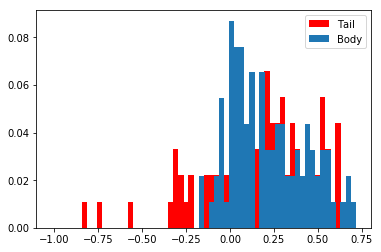

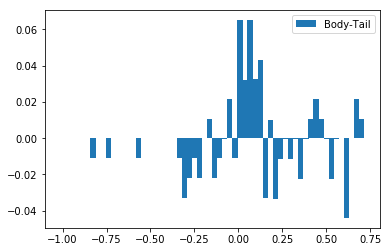

Body acc 12.05.05-30.04.06: 0.21669238447
Tail acc 30.04.06-13.06.06: 0.179029631742


In [65]:
accs_body=pd.Series(accs_body).dropna()
accs_tail=pd.Series(accs_tail).dropna()

bins=60

def acc_dens(accs,bins):
    dens=np.zeros(bins)
    interval=[-1.0,0.73]
    ac=[]
    for i in range(bins):
        a=interval[0]+(interval[1]-interval[0])*i/bins
        b=interval[0]+(interval[1]-interval[0])*(i+1)/bins
        for acc in accs:
            if acc>a and acc<=b:
                dens[i]+=1
        ac.append(a)
    dens=dens/dens.sum()
    return dens, ac

plt.bar(acc_dens(accs_body,bins)[1], acc_dens(accs_body,bins)[0],width=0.03,label='Body')
plt.bar(acc_dens(accs_tail,bins)[1], acc_dens(accs_tail,bins)[0],width=0.03,label='Tail',color='r')
plt.legend()
plt.show()

plt.bar(acc_dens(accs_tail,bins)[1], acc_dens(accs_tail,bins)[0],width=0.03,label='Tail',color='r')
plt.bar(acc_dens(accs_body,bins)[1], acc_dens(accs_body,bins)[0],width=0.03,label='Body')
plt.legend()
plt.show()

plt.bar(acc_dens(accs_body,bins)[1], acc_dens(accs_body,bins)[0]-acc_dens(accs_tail,bins)[0],width=0.03,label='Body-Tail')
plt.legend()
plt.show()


print('Body acc 12.05.05-30.04.06: '+str(accs_body.mean()))
print('Tail acc 30.04.06-13.06.06: '+str(accs_tail.mean()))

## Step 4.3
The barchart for used data (Body) has higher probability of high accuracies more than unused data (Tail). Peak of Tail is located to the right of Body peak, but Body chart is heavy at the right side unlike Tail chart